In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
import pickle 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,LSTM

In [2]:
df = pd.read_csv('clean_data.csv',index_col=0)
df.head()

,clean_text,Cataogory_Enc
0,skills programming languages python pandas num...,0
1,education details may may b e uit rgpv data sc...,0
2,areas interest deep learning control system de...,0
3,skills r python sap hana tableau sap hana sql ...,0
4,education details mca ymcaust faridabad haryan...,0


In [3]:
df['clean_text'] = df['clean_text'].apply(lambda x:str(x))

In [4]:
x = df['clean_text']
y = df['Cataogory_Enc']

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.3)

## Tokenization

In [6]:
tok = Tokenizer(oov_token = '<UNK>')

In [7]:
# we fit only on training data and just transform that on testing data

In [8]:
#fitting on training data
tok.fit_on_texts(x_train)

In [9]:
len(tok.word_index)

7069

In [10]:
# just transforming the test data
train_sequences = tok.texts_to_sequences(x_train)
test_sequences = tok.texts_to_sequences(x_test)

In [11]:
with open('filename.pickle', 'wb') as handle:
    pickle.dump(tok, handle, protocol=pickle.HIGHEST_PROTOCOL)


## Padding

(array([14., 16., 47., 65., 43., 50., 46., 22., 72., 36.]),
 array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.]),
 <BarContainer object of 10 artists>)

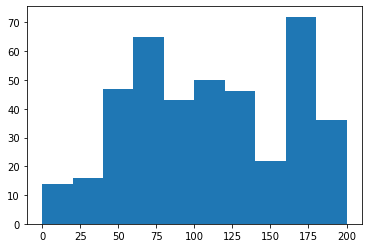

In [12]:
plt.hist(df['clean_text'].apply(lambda x:len(x.split())),range = (0,200))

In [13]:
x_train = pad_sequences(train_sequences,maxlen=100,padding='pre',truncating='pre')
x_test = pad_sequences(test_sequences,maxlen=100,padding='pre',truncating='pre')

## Model Fitting

In [14]:
model = Sequential([
    Embedding(92706,300),
    LSTM(128),
    Dense(100,activation='relu'),
    Dense(6,activation='softmax')  
    
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 300)         27811800  
                                                                 
 lstm (LSTM)                 (None, 128)               219648    
                                                                 
 dense (Dense)               (None, 100)               12900     
                                                                 
 dense_1 (Dense)             (None, 6)                 606       
                                                                 
Total params: 28,044,954
Trainable params: 28,044,954
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer='adam',loss= 'SparseCategoricalCrossentropy',metrics=['accuracy'])

In [17]:
history = model.fit(x_train,y_train,batch_size=500,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
2/2 [==============================] - 4s 1s/step - loss: 1.7874 - accuracy: 0.2912 - val_loss: 1.7649 - val_accuracy: 0.7128
Epoch 2/10
2/2 [==============================] - 2s 700ms/step - loss: 1.7607 - accuracy: 0.6776 - val_loss: 1.7352 - val_accuracy: 0.6920
Epoch 3/10
2/2 [==============================] - 2s 705ms/step - loss: 1.7284 - accuracy: 0.6761 - val_loss: 1.6901 - val_accuracy: 0.6851
Epoch 4/10
2/2 [==============================] - 2s 725ms/step - loss: 1.6793 - accuracy: 0.6716 - val_loss: 1.6147 - val_accuracy: 0.6747
Epoch 5/10
2/2 [==============================] - 2s 744ms/step - loss: 1.6000 - accuracy: 0.6478 - val_loss: 1.4690 - val_accuracy: 0.6228
Epoch 6/10
2/2 [==============================] - 2s 717ms/step - loss: 1.4418 - accuracy: 0.5765 - val_loss: 1.2114 - val_accuracy: 0.5433
Epoch 7/10
2/2 [==============================] - 2s 703ms/step - loss: 1.2170 - accuracy: 0.5394 - val_loss: 0.9832 - val_accuracy: 0.6263
Epoch 8/10
2/2 [=======

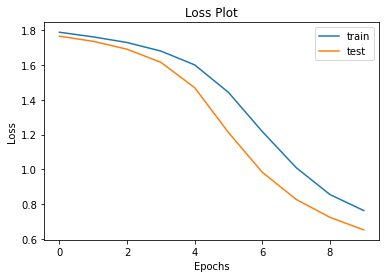

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.legend(['train','test'])

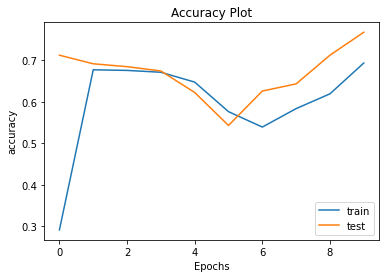

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.title('Accuracy Plot')
plt.legend(['train','test'])

In [20]:
model.save('LSTM_Model.h5')